In [1]:
import pandas as pd
dataset  = pd.read_csv("./SupplyChain.csv", encoding= 'unicode_escape')
dataset



,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
dataset['Customer Id'].value_counts()

5654     47
5004     45
10591    45
5715     44
3708     44
         ..
13486     1
17887     1
15952     1
13905     1
14375     1
Name: Customer Id, Length: 20652, dtype: int64

In [7]:
dataset.shape

temp = dataset.isnull().sum()
temp[temp>0].index

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

In [9]:
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'].fillna('725.0', inplace=True)

In [10]:
data = dataset
data.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,-0.001631,-0.004073,0.003911,...,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.000262,-0.005300,0.003675,...,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.031442,0.000338,-0.002521,...,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,0.232367,-0.000223,0.001444,...,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.001077,0.000679,-0.001915,...,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.888835,0.002195,-0.002320,...,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.136897,0.002335,-0.005146,...,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,1.000000,0.002460,-0.002435,...,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.002460,1.000000,-0.525122,...,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN
Longitude,0.003911,0.003675,-0.002521,0.001444,-0.001915,-0.002320,-0.005146,-0.002435,-0.525122,1.000000,...,0.004467,0.001696,0.001444,-0.002521,-0.005880,-0.002580,-0.002320,NaN,-0.000894,NaN


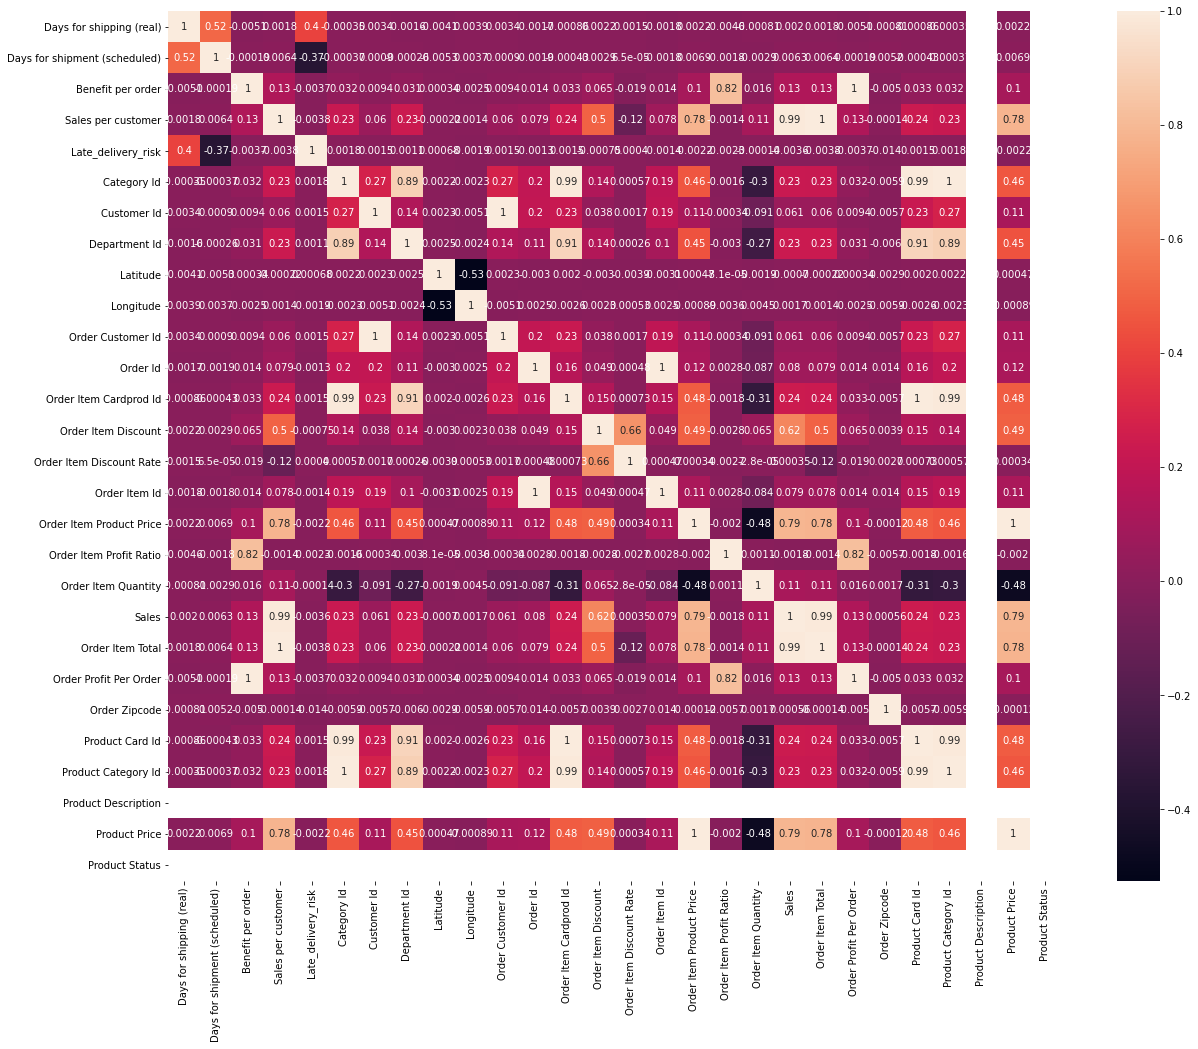

In [11]:

import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,16))
data = dataset
sns.heatmap(data.corr(), annot=True)

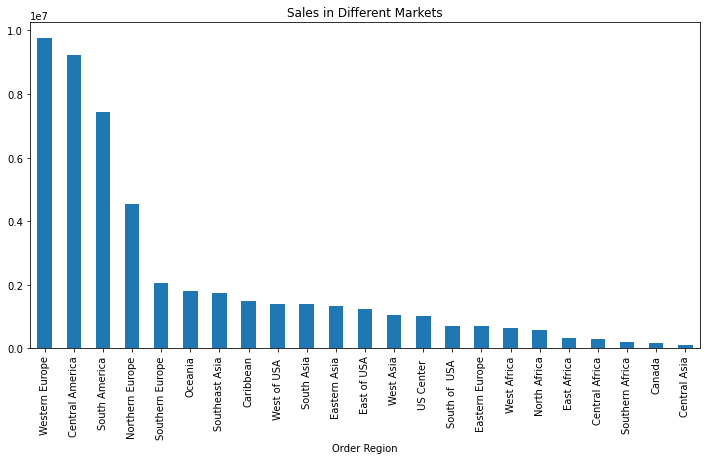

In [14]:
market =data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title = 'Sales in Different Markets')

plt.show()

region =data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title = 'Sales in Region')
plt.show()


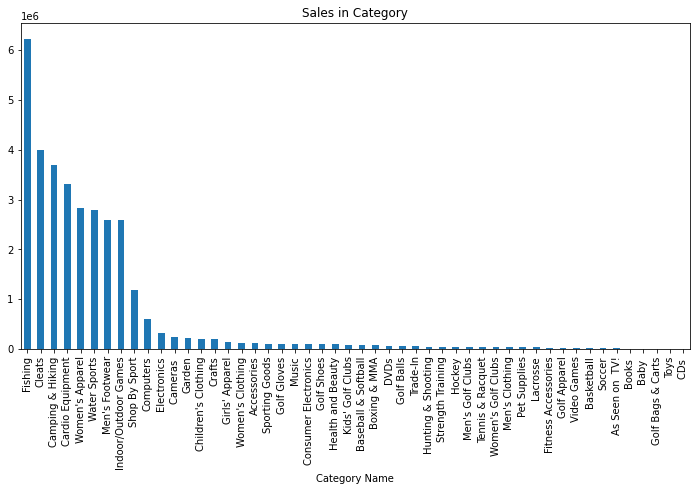

In [15]:

cat =data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title = 'Sales in Category')
plt.show()

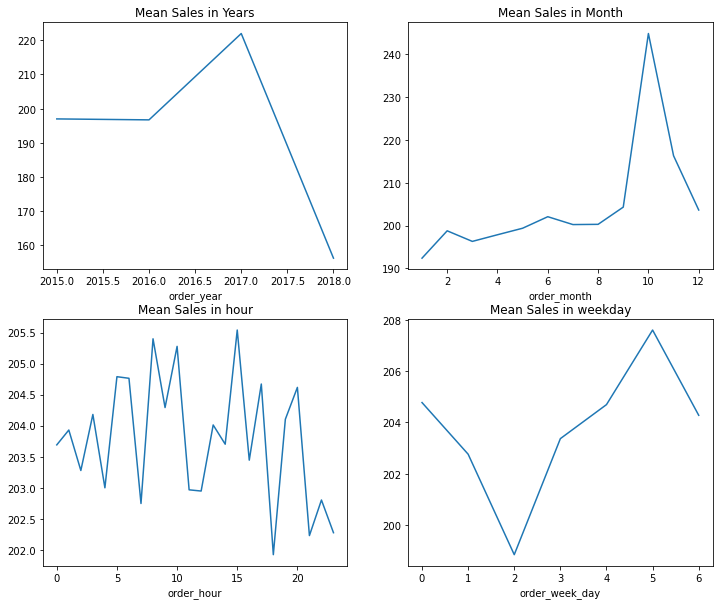

In [18]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour

plt.figure(figsize= (12,10))
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(title= 'Mean Sales in Years')

plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(title= 'Mean Sales in Month')

plt.subplot(2,2,3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(title= 'Mean Sales in hour')

plt.subplot(2,2,4)
df_week_day = data.groupby('order_week_day')
df_week_day['Sales'].mean().plot(title= 'Mean Sales in weekday')


In [20]:



data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max()

import datetime
now = datetime.datetime(2018,2,1)

customer_seg = data.groupby('order date (DateOrders)').agg({'order date (DateOrders)': lambda x: (now-x.max()).days, \
			'Order Id': lambda x:len(x), 'Sales': lambda x:x.sum()})
customer_seg


,order date (DateOrders),Order Id,Sales
order date (DateOrders),,,
2015-01-01 00:00:00,1127,1,299.980011
2015-01-01 00:21:00,1126,3,579.980011
2015-01-01 01:03:00,1126,4,699.850010
2015-01-01 01:24:00,1126,5,1129.860039
2015-01-01 02:06:00,1126,3,579.920013
...,...,...,...
2018-01-31 22:14:00,0,1,215.820007
2018-01-31 22:35:00,0,1,215.820007
2018-01-31 22:56:00,0,1,327.750000


In [27]:

customer_seg.rename(columns={'order date (DateOrders)':'R_value','Order Id':'F_value', 'Sales':'M_value'},inplace=True)
quantiles = customer_seg.quantile(q=[0.5])
quantiles = quantiles.to_dict()
quantiles





{'R_value': {0.5: 551.0},
 'F_value': {0.5: 3.0},
 'M_value': {0.5: 504.89000793499997}}

In [30]:

def R_Score(x,b,c):
	if x< c[b][0.5]:
		return 2
	else:
		return 1

def FM_Score(x,b,c):
	if x>= c[b][0.5]:
		return 2
	else:
		return 1


customer_seg['R_Score'] = customer_seg['R_value'].apply(R_Score, args= ('R_value', quantiles))

customer_seg['F_Score'] = customer_seg['F_value'].apply(FM_Score, args= ('F_value', quantiles))

customer_seg['M_Score'] = customer_seg['M_value'].apply(FM_Score, args= ('M_value', quantiles))


customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score
order date (DateOrders),,,,,,
2015-01-01 00:00:00,1127,1,299.980011,1,1,1
2015-01-01 00:21:00,1126,3,579.980011,1,2,2
2015-01-01 01:03:00,1126,4,699.850010,1,2,2
2015-01-01 01:24:00,1126,5,1129.860039,1,2,2
2015-01-01 02:06:00,1126,3,579.920013,1,2,2
...,...,...,...,...,...,...
2018-01-31 22:14:00,0,1,215.820007,2,1,1
2018-01-31 22:35:00,0,1,215.820007,2,1,1
2018-01-31 22:56:00,0,1,327.750000,2,1,1


In [31]:
def RFM_users(df):
	if df['M_Score'] == 2 and df['F_Score'] == 2 and df['R_Score'] == 2:
		return '重要价值用户'
	if df['M_Score'] == 2 and df['F_Score'] == 1 and df['R_Score'] == 2:
		return '重要发展用户'
	if df['M_Score'] == 2 and df['F_Score'] == 2 and df['R_Score'] == 1:
		return '重要保持用户'
	if df['M_Score'] == 2 and df['F_Score'] == 1 and df['R_Score'] == 1:
		return '重要挽留用户'

	if df['M_Score'] == 1 and df['F_Score'] == 2 and df['R_Score'] == 2:
		return '一般价值用户'
	if df['M_Score'] == 1 and df['F_Score'] == 1 and df['R_Score'] == 2:
		return '一般发展用户'
	if df['M_Score'] == 1 and df['F_Score'] == 2 and df['R_Score'] == 1:
		return '一般保持用户'
	if df['M_Score'] == 1 and df['F_Score'] == 1 and df['R_Score'] == 1:
		return '一般挽留用户'


customer_seg['Cutomers Type'] = customer_seg.apply(RFM_users, axis=1)
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Cutomers Type
order date (DateOrders),,,,,,,
2015-01-01 00:00:00,1127,1,299.980011,1,1,1,一般挽留用户
2015-01-01 00:21:00,1126,3,579.980011,1,2,2,重要保持用户
2015-01-01 01:03:00,1126,4,699.850010,1,2,2,重要保持用户
2015-01-01 01:24:00,1126,5,1129.860039,1,2,2,重要保持用户
2015-01-01 02:06:00,1126,3,579.920013,1,2,2,重要保持用户
...,...,...,...,...,...,...,...
2018-01-31 22:14:00,0,1,215.820007,2,1,1,一般发展用户
2018-01-31 22:35:00,0,1,215.820007,2,1,1,一般发展用户
2018-01-31 22:56:00,0,1,327.750000,2,1,1,一般发展用户
